In [2]:
import matplotlib as mpl
import matplotlib.pyplot as plt

%matplotlib inline
mpl.style.use('bmh')

In [3]:
import numpy as np
from pyemd import emd

In [4]:
def make_distance_matrix(dim, cost=1):
    
    d = np.zeros((dim, dim))
    
    for i in range(dim):
        for j in range(dim):
            d[i][j] = abs(i-j)*cost
            
    return d

In [5]:
s1 = np.array([1.0, 0.0, 0.0, 0.0, 0.0])
s2 = np.array([0.0, 0.0, 0.0, 0.5, 0.5])

emd(s1, s2, make_distance_matrix(5))

3.5

In [13]:
from numpy.random import multinomial

def sample_series(series, n=1000):
    return multinomial(series.sum(), series/series.sum(), n).astype(float)

In [30]:
def sample_uniform_emds(token_count):

    uniform = np.full(100, token_count/100).astype(float)

    return np.array([
        emd(uniform, s, make_distance_matrix(100))
        for s in sample_series(uniform)
    ])

In [ ]:
x = range(0, 1000000, 10000)

y = [sample_uniform_emds(c).std() for c in x]

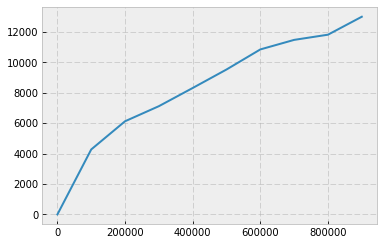

In [40]:
plt.plot(x, y)